In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

import matplotlib.pyplot as plt

# Load Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, '[6]')

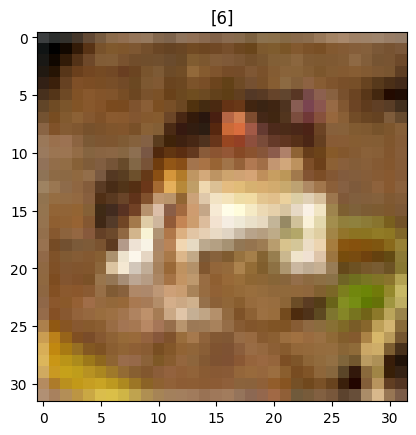

In [5]:
plt.imshow(x_train[0])
plt.title(y_train[0])

In [6]:
type(y_train)

numpy.ndarray

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
type(x_train)

numpy.ndarray

In [9]:
np.max(x_train)

np.uint8(255)

In [10]:
#normalizing the dataset
x_train, x_test = x_train/255.0, x_test/255.0

In [11]:
# one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convolution Neural Network

In [13]:
cnn_model = Sequential([
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, kernel_size = (3, 3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),

    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')

])

C:\Users\jmebil\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 902,538 (3.44 MB)

 Trainable params: 901,642 (3.44 MB)

 Non-trainable params: 896 (3.50 KB)

In [15]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.8416 - loss: 0.4585 - val_accuracy: 0.6947 - val_loss: 0.9640
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.8621 - loss: 0.4012 - val_accuracy: 0.7299 - val_loss: 0.8446
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.8732 - loss: 0.3599 - val_accuracy: 0.7466 - val_loss: 0.8734
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.8952 - loss: 0.2998 - val_accuracy: 0.7214 - val_loss: 1.0357
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.9053 - loss: 0.2714 - val_accuracy: 0.6811 - val_loss: 1.4007
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.9155 - loss: 0.2432 - val_accuracy: 0.7387 - val_loss: 1.0621
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.9235 - loss: 0.2179 - val_accuracy: 0.7100 - val_loss: 1.1379
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.9300 - loss: 0

In [19]:
cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7690 - loss: 1.0314


[1.0327204465866089, 0.7684000134468079]

In [22]:
cnn_model.save('cifar10_model.keras')

C:\Users\jmebil\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


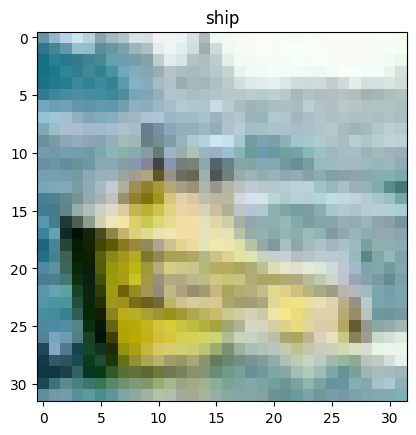

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Prediction: ship


In [25]:
cifar10_model = load_model('cifar10_model.keras')

test_index = 2502

plt.imshow(x_test[test_index])
plt.title(class_names[np.argmax(y_test[test_index])])
plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

test_image = x_test[test_index].reshape(1, 32, 32, 3)

prediction = cifar10_model.predict(test_image)

class_prediction = class_names[np.argmax(prediction)]

print(f'Prediction: {class_prediction}')

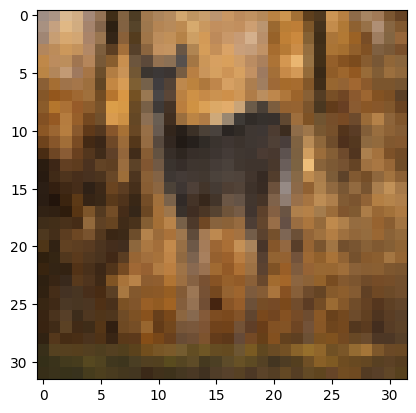

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: horse


In [31]:
from PIL import Image

image_path = 'deer.jpg'

image = Image.open(image_path)
image = image.resize((32, 32))
image = image.convert('RGB')

plt.imshow(image)
plt.show()

image_array = np.array(image)
image_array = image_array / 255.0
image_array = image_array.reshape(1, 32, 32, 3)

prediction = cifar10_model.predict(image_array)

class_prediction = class_names[np.argmax(prediction)]

print(f'Prediction: {class_prediction}')